# Часть 1

<ipython-input-7-e137b3e7c3d1>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'date': pd.date_range(start='2022-01-01', periods=num_transactions, freq='H'),


Первые 5 строк данных:
   transaction_id                date  customer_id product_id  category  \
0               1 2022-01-01 00:00:00         1051       P500  Clothing   
1               2 2022-01-01 01:00:00         1092       P500    Sports   
2               3 2022-01-01 02:00:00         1014       P100    Sports   
3               4 2022-01-01 03:00:00         1071       P400      Home   
4               5 2022-01-01 04:00:00         1060       P200  Clothing   

   quantity   price payment_method  customer_age customer_region  total_sales  
0         3  226.56  Bank Transfer            47            West     7068.672  
1         3  381.43     Debit Card            44            West    11214.042  
2         4  259.61         PayPal            28            West     6853.704  
3         7  156.72    Credit Card            21           North        0.000  
4         6  109.43    Credit Card            35            West     5252.640  

Информация о данных:
<class 'pandas.core.fram

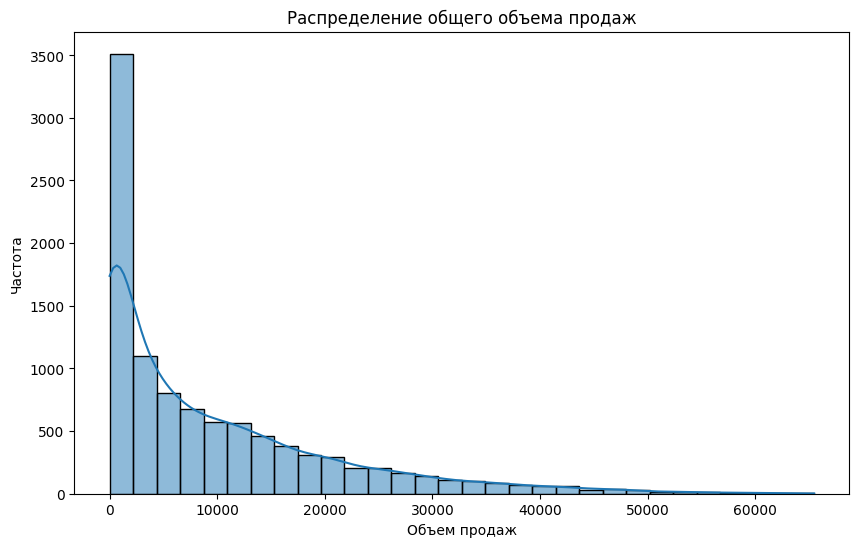


Пропущенные значения:
transaction_id     0
date               0
customer_id        0
product_id         0
category           0
quantity           0
price              0
payment_method     0
customer_age       0
customer_region    0
total_sales        0
dtype: int64


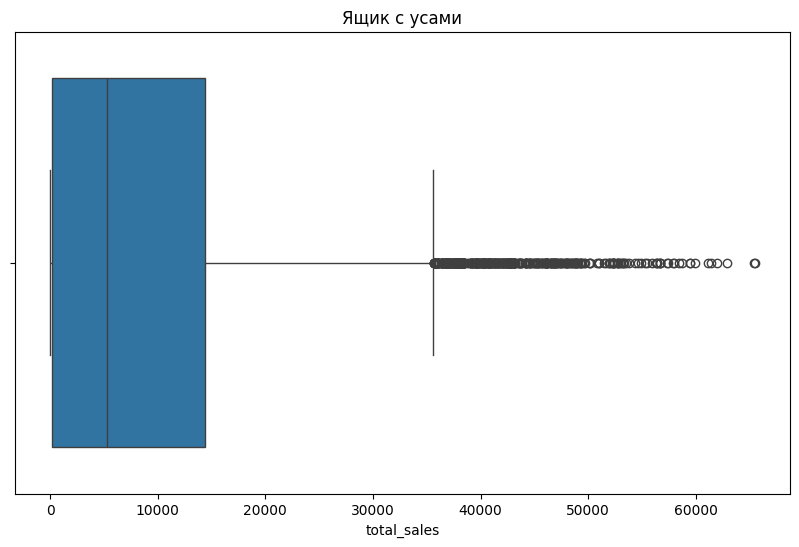


Размер тренировочной выборки: (7920, 14)
Размер тестовой выборки: (1980, 14)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Генерация данных в кооичесве 10000

np.random.seed(42)
num_transactions = 10000

data = {
    'transaction_id': range(1, num_transactions+1),
    'date': pd.date_range(start='2022-01-01', periods=num_transactions, freq='H'),
    'customer_id': np.random.randint(1000, 1100, size=num_transactions),
    'product_id': np.random.choice(['P100', 'P200', 'P300', 'P400', 'P500'], size=num_transactions),
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Sports'], size=num_transactions),
    'quantity': np.random.randint(1, 10, size=num_transactions),
    'price': np.round(np.random.uniform(10, 500, size=num_transactions), 2),
    'payment_method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'], size=num_transactions),
    'customer_age': np.random.randint(18, 70, size=num_transactions),
    'customer_region': np.random.choice(['North', 'South', 'East', 'West'], size=num_transactions)
}
df = pd.DataFrame(data)
df['total_sales'] = np.where(
    df['customer_region'] == 'North',
    0,
    df['quantity'] * df['price'] + df['quantity'] * df['price']* df['customer_age'] * 0.2
)



#Общая информафия о данных
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe(include='all'))

# Визуализация
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales'], bins=30, kde=True)
plt.title('Распределение общего объема продаж')
plt.xlabel('Объем продаж')
plt.ylabel('Частота')
plt.show()

# Проверка на пропущенные значения и аномалии
print("\nПропущенные значения:")
print(df.isnull().sum())

# Добавим несколько пропущенных значений для демонстрации
df.loc[np.random.choice(df.index, size=50), 'customer_age'] = np.nan


# Обработка пропущенных значений
# Для числовых - медиана
imputer_num = SimpleImputer(strategy='median')
df['customer_age'] = imputer_num.fit_transform(df[['customer_age']])


# Проверка аномалий
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_sales'])
plt.title('Ящик с усами')
plt.show()

# Удаление экстремальных выбросов (верхние 1%)
q_high = df['total_sales'].quantile(0.99)
df = df[df['total_sales'] < q_high]

# Кодирование категориальных переменных
# One-hot для payment_method и customer_region
df = pd.get_dummies(df, columns=['payment_method', 'customer_region'], prefix=['pay', 'region'])

# Label encoding для product_id и category
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])
df['category'] = le.fit_transform(df['category'])

# 4. Разделение на тренировочную и тестовую выборки
X = df.drop(['transaction_id', 'date', 'total_sales'], axis=1)
y = df['total_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nРазмер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Базовая модель


---




Результаты базовых моделей:
Linear Regression:
  MSE: 31387507.43
  MAE: 4114.46

Decision Tree:
  MSE: 945417.59
  MAE: 507.39

KNN:
  MSE: 81773584.11
  MAE: 6370.93



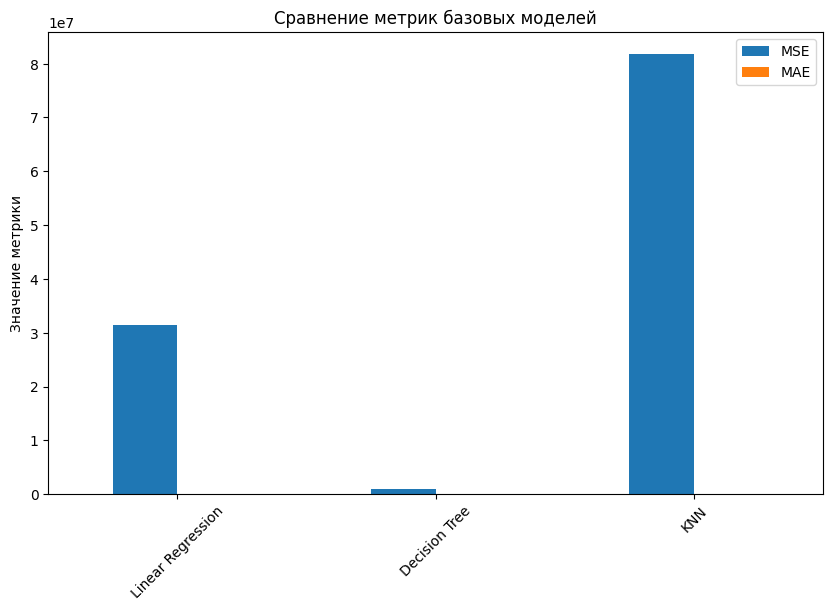

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Выбор и обучение моделей
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

#Обучение и оценка моделей
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}

#Вывод результатов
print("\nРезультаты базовых моделей:")
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print()

# Визуализация результатов
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение метрик базовых моделей')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.show()

# Оптимизация модели


Лучшие параметры для Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Лучшие параметры для Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Лучшие параметры для Neural Network:
{'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}

Результаты оптимизированных моделей:
Random Forest:
  MSE: 299172.72
  MAE: 268.70

Gradient Boosting:
  MSE: 170969.97
  MAE: 219.61

Neural Network:
  MSE: 2868765.40
  MAE: 1229.18



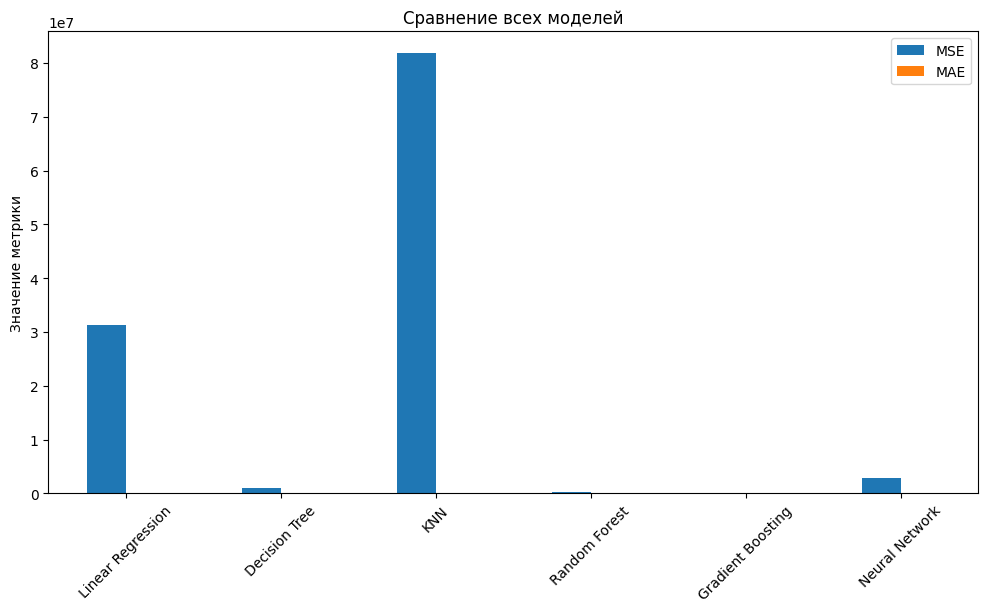

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPRegressor

advanced_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=500)
}

#Кросс-валидация и подбор гиперпараметров
# Параметры для GridSearch
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Обучение с подбором параметров
best_models = {}
for name, model in advanced_models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5,
                             scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"\nЛучшие параметры для {name}:")
    print(grid_search.best_params_)

#Оценка производительности
advanced_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    advanced_results[name] = {'MSE': mse, 'MAE': mae}

# Вывод результатов
print("\nРезультаты оптимизированных моделей:")
for model, metrics in advanced_results.items():
    print(f"{model}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print()

# Сравнение с базовыми моделями
all_results = {**results, **advanced_results}
metrics_df = pd.DataFrame(all_results).T
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение всех моделей')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.show()

# Интрепретация резульататов

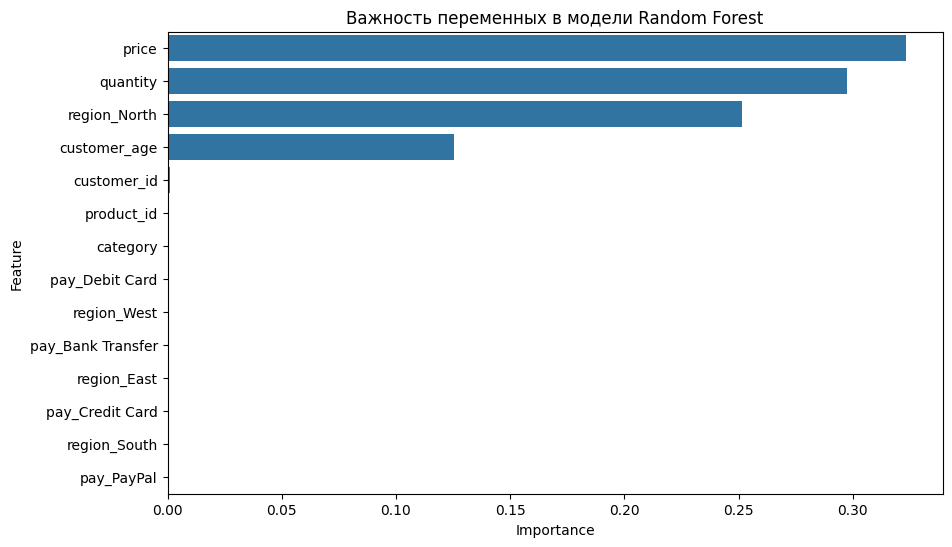

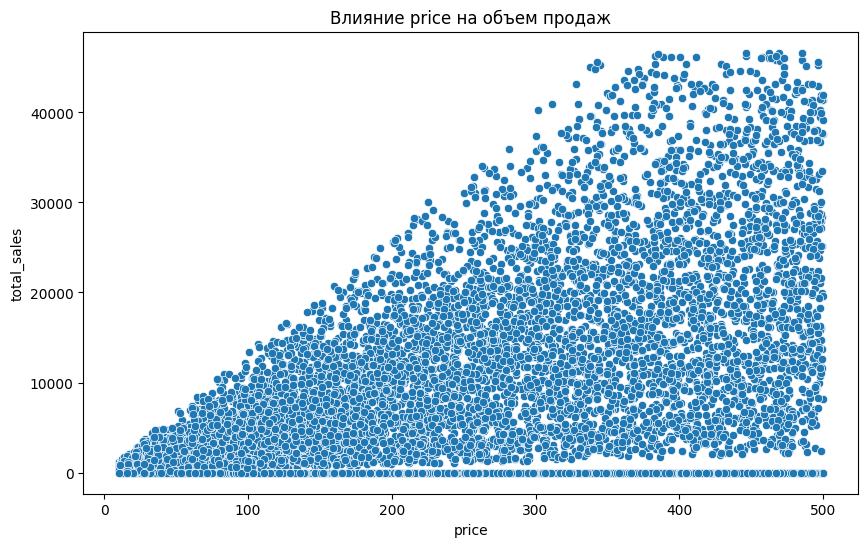

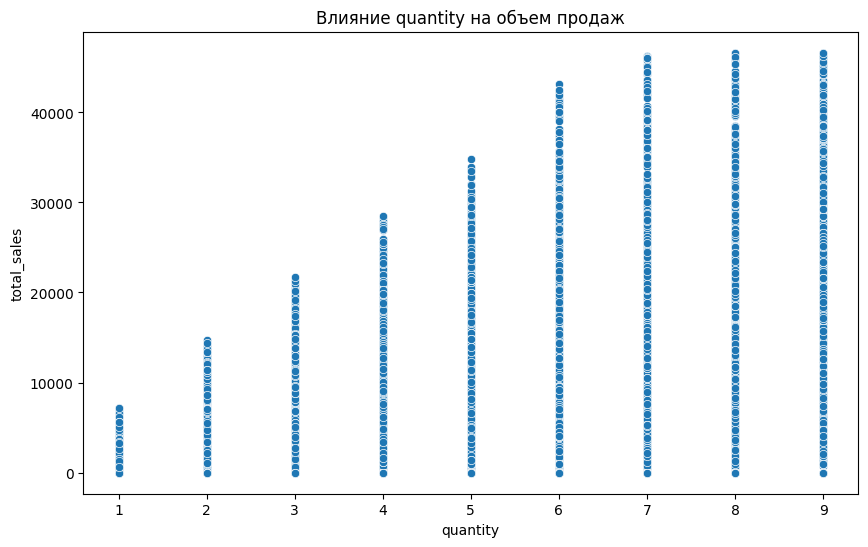

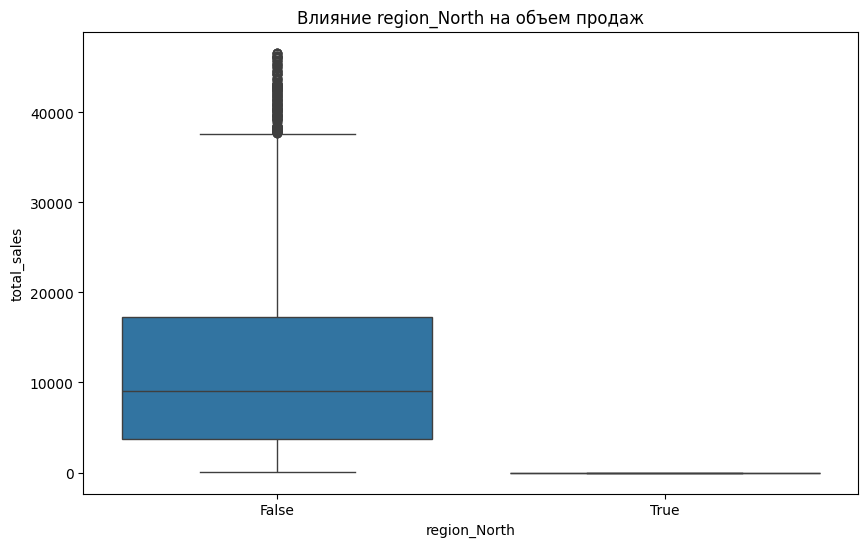

In [ ]:
#Важность переменных в лучшей модели (Random Forest)
best_model = best_models['Random Forest']
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Важность переменных в модели Random Forest')
plt.show()

#Анализ влияния ключевых переменных
top_features = feature_importances['Feature'].head(3).values

for feature in top_features:
    plt.figure(figsize=(10, 6))
    if feature in ['price', 'quantity', 'customer_age']:
        sns.scatterplot(x=df[feature], y=df['total_sales'])
    else:
        sns.boxplot(x=df[feature], y=df['total_sales'])
    plt.title(f'Влияние {feature} на объем продаж')
    plt.show()

# часть 5: Выводы и рекомендации

Основные выводы:
Наибольшее влияние на объем продаж оказывают цена товара, количество проданных единиц, возраст покупателя и регион.

Gradient Boosting показал наилучшие результаты среди всех моделей с MSE= 170969.97 MAE = 219.61


Рекомендации:


1.   Собрать больше данных о покупателях (пол, доход, история покупок) для улучшения модели.
2.   Реализовать мониторинг дрейфа данных для своевременного переобучения модели.
3. Добавить временные характеристики (день недели, месяц, праздники) для учета сезонности.



# Часть 6: Ответы на вопросы
Основы анализа данных
Что такое EDA и почему он важен в аналитике?
EDA (Exploratory Data Analysis) - это процесс исследования данных с использованием статистических методов и визуализации для понимания их структуры, выявления закономерностей, аномалий и взаимосвязей. EDA важен, так как позволяет:


1.   Понять природу данных перед моделированием
2.   Выявить проблемы в данных (пропуски, аномалии)
3. Определить важные переменные
4. Выбрать подходящие методы анализа



Как вы справляетесь с пропущенными значениями в наборе данных?
Стратегии обработки пропущенных значений:

1. Удаление -Удаление строк с пропусками (если их мало)\удаление столбцов с большим % пропусков

2. Заполнение:  Числовые: среднее, медиана, мода, предсказание

Категориальные: мода, новую категорию "Unknown"

3. Использование алгоритмов, устойчивых к пропускам (напр., Random Forest)

Какие виды аномалий вы знаете и как их можно обнаружить?
Виды аномалий:

1. Точечные аномалии - отдельные выбросы

2. Контекстуальные аномалии - нормальные в одном контексте, но аномальные в другом

3. Коллективные аномалии - группа данных аномальна, хотя отдельные точки нормальны

Методы обнаружения:

1. Визуальные: boxplot, scatterplot

2. Статистические: z-score, IQR

3. Алгоритмы: Isolation Forest, DBSCAN, One-Class SVM

Предобработка данных
В чем разница между one-hot кодированием и label encoding? Когда использовать каждое из них?

Label Encoding присваивает каждой категории уникальное число (0, 1, 2,...). Подходит для: деревьев решений и ансамблевых методов, порядковых категориальных данных

One-Hot Encoding создает отдельный бинарный столбец для каждой категории. Подходит для:линейных моделей, SVM, нейронных сетей;номинальных категориальных данных без порядка;когда количество категорий невелико

Зачем нужно нормализовать или стандартизировать данные?
Нормализация (приведение к диапазону [0,1]) и стандартизация (приведение к μ=0, σ=1) нужны для:
алгоритмов, чувствительных к масштабу (k-NN, нейронные сети, SVM, PCA);
ускорения сходимости градиентного спуска;
сравнения признаков в одном масштабе.

Как вы решаете проблему дисбаланса классов в выборке?
Методы борьбы с дисбалансом:
1. Oversampling меньшего класса undersampling большего класса

2. Использование взвешенных функций потерь

3. Изменение порога классификации

4. Использование метрик, устойчивых к дисбалансу (F1, AUC-ROC)

Методы машинного обучения
Объясните разницу между методом дерева решений и случайным лесом.

Дерево решений:

1. Одно дерево, которое рекурсивно разделяет данные

2. Склонно к переобучению

3. Легко интерпретируется

Случайный лес:

1. Ансамбль многих деревьев (бэггинг)

2. Каждое дерево обучается на подвыборке данных и признаков

3. Менее склонен к переобучению

4. Лучшая обобщающая способность

5. Менее интерпретируем

Как вы выбираете гиперпараметры для модели?
Методы подбора гиперпараметров:

1. Grid Search - полный перебор по сетке параметров

2. Random Search - случайный поиск по распределениям

3. Bayesian Optimization - адаптивный выбор параметров

4. Automl - автоматизированные системы (Optuna, Hyperopt)

В чем разница между регрессией и классификацией?

Регрессия:

1. Предсказание непрерывной величины (цена, объем продаж)

2. Метрики: MSE, MAE, R²

3. Алгоритмы: линейная регрессия, Random Forest Regressor etc

Классификация:

1. Предсказание дискретного класса (да/нет, категория)

2. Метрики: accuracy, precision, recall, F1

3. Алгоритмы: логистическая регрессия, Random Forest Classifier etc

Оценка моделей

Какие метрики вы используете для оценки качества моделей регрессии? А для классификации?

Регрессия:

1.MSE (Mean Squared Error) - чувствительна к выбросам

2. RMSE (Root MSE) - в исходных единицах

3. MAE (Mean Absolute Error) - устойчива к выбросам

4. R² (коэффициент детерминации) - доля объясненной дисперсии

Классификация:

1. Accuracy - доля верных предсказаний (не для дисбаланса)

2. Precision - точность положительного класса

3. Recall - полнота положительного класса

4. F1-score - гармоническое среднее precision и recall

5. AUC-ROC - площадь под кривой ошибок

Что такое ROC-кривая и AUC? Как они используются?

ROC-кривая (Receiver Operating Characteristic) - график зависимости True Positive Rate (Recall) от False Positive Rate. Показывает компромисс между точностью и полнотой

AUC (Area Under Curve)- Площадь под ROC-кривой (от 0 до 1). Чем ближе к 1, тем лучше модель разделяет классы. Независит от порога классификации

Почему важно использовать кросс-валидацию?
Кросс-валидация (обычно k-fold) позволяет:

1.Более точно оценить обобщающую способность модели

2. Уменьшить зависимость оценки от разбиения на train/test

3. Эффективнее использовать данные (особенно при малом объеме)
4. Выбирать гиперпараметры

Интерпретация моделей
Важность переменных определяется:

1. Коэффициентами (линейные модели)

2. Снижением accuracy/impurity (деревья)

3. Перестановочной важностью

4. SHAP значениями

Overfitting и underfitting:

Overfitting - модель слишком сложная, запоминает данные

Underfitting - модель слишком простая, не улавливает закономерности
Методы борьбы: регуляризация, кросс-валидация, упрощение/усложнение модели

Интерпретация результатов:

1. Анализ важности признаков

2. Частные зависимости (PDP plots)

3. Локальные объяснения (LIME, SHAP)

4. Анализ ошибок модели

Практическое применение
Процесс создания модели:

1. Постановка задачи

2. Сбор и подготовка данных

3. Разведочный анализ (EDA)

4. Предобработка данных

5. Выбор и обучение моделей

6. Оценка и интерпретация

7. Внедрение и мониторинг

Проблемы при развертывании:

1. Смещение данных (data drift)

2. Изменение распределений

3. Проблемы с масштабированием

4. Необходимость переобучения

Тестирование на новых данных:

1. A/B тестирование

3. Мониторинг метрик качества

4. Анализ ошибок модели